In [ ]:
import pickle
pickle_file_link = "/content/drive/MyDrive/datas"
X_train = pickle.load(open(f"{pickle_file_link}/X_train.pickle","rb"))
y_train = pickle.load(open(f"{pickle_file_link}/y_train.pickle","rb"))

X_test = pickle.load(open(f"{pickle_file_link}/X_test.pickle","rb"))
y_test = pickle.load(open(f"{pickle_file_link}/y_test.pickle","rb"))

X_valid = pickle.load(open(f"{pickle_file_link}/X_valid.pickle","rb"))
y_valid = pickle.load(open(f"{pickle_file_link}/y_valid.pickle","rb"))

In [ ]:
import matplotlib.pyplot as pyplot
import numpy as np
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

In [ ]:
print(X_train[0])
print(X_test[0])
print(X_valid[0])

[[1.         1.         0.45882356 ... 0.         0.         0.        ]
 [1.         1.         0.47450984 ... 0.         0.         0.        ]
 [1.         1.         0.47450984 ... 0.         0.         0.        ]
 ...
 [1.         1.         0.45882356 ... 0.         0.         0.        ]
 [1.         1.         0.9725491  ... 0.9725491  0.9725491  0.9725491 ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         0.45882356 ... 0.         0.         0.        ]
 [1.         1.         0.47450984 ... 0.         0.         0.        ]
 [1.         1.         0.47450984 ... 0.         0.         0.        ]
 ...
 [1.         1.         0.45882356 ... 0.28627452 0.30980393 0.24313727]
 [1.         1.         0.9725491  ... 0.9725491  0.9725491  0.9725491 ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         0.45882356 ... 0.         0.         0.        ]
 [1.         1.         0.47450984 ... 

In [ ]:
X_train = X_train/100
X_test = X_test/100
X_valid = X_valid/100

In [ ]:
print(X_train[0])
print(X_test[0])
print(X_valid[0])

[[0.01       0.01       0.00458824 ... 0.         0.         0.        ]
 [0.01       0.01       0.0047451  ... 0.         0.         0.        ]
 [0.01       0.01       0.0047451  ... 0.         0.         0.        ]
 ...
 [0.01       0.01       0.00458824 ... 0.         0.         0.        ]
 [0.01       0.01       0.00972549 ... 0.00972549 0.00972549 0.00972549]
 [0.01       0.01       0.01       ... 0.01       0.01       0.01      ]]
[[0.01       0.01       0.00458824 ... 0.         0.         0.        ]
 [0.01       0.01       0.0047451  ... 0.         0.         0.        ]
 [0.01       0.01       0.0047451  ... 0.         0.         0.        ]
 ...
 [0.01       0.01       0.00458824 ... 0.00286275 0.00309804 0.00243137]
 [0.01       0.01       0.00972549 ... 0.00972549 0.00972549 0.00972549]
 [0.01       0.01       0.01       ... 0.01       0.01       0.01      ]]
[[0.01       0.01       0.00458824 ... 0.         0.         0.        ]
 [0.01       0.01       0.0047451  ... 

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

In [ ]:
sample = X_train[0].reshape(X_train[0].shape[0], X_train[0].shape[1], 1)

In [ ]:
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=sample.shape))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=25, batch_size=20)

Epoch 1/25
334/334 [==============================] - 24s 38ms/step - loss: 1.7138 - accuracy: 0.3861 - val_loss: 1.4778 - val_accuracy: 0.4695
Epoch 2/25
334/334 [==============================] - 12s 35ms/step - loss: 1.2285 - accuracy: 0.5824 - val_loss: 1.2486 - val_accuracy: 0.6008
Epoch 3/25
334/334 [==============================] - 12s 35ms/step - loss: 1.0527 - accuracy: 0.6496 - val_loss: 1.1563 - val_accuracy: 0.6321
Epoch 4/25
334/334 [==============================] - 12s 35ms/step - loss: 0.8990 - accuracy: 0.7044 - val_loss: 1.1424 - val_accuracy: 0.6450
Epoch 5/25
334/334 [==============================] - 12s 35ms/step - loss: 0.7881 - accuracy: 0.7444 - val_loss: 1.0068 - val_accuracy: 0.6733
Epoch 6/25
334/334 [==============================] - 12s 35ms/step - loss: 0.6787 - accuracy: 0.7811 - val_loss: 0.9374 - val_accuracy: 0.7076
Epoch 7/25
334/334 [==============================] - 12s 35ms/step - loss: 0.5706 - accuracy: 0.8127 - val_loss: 1.0449 - val_accuracy:

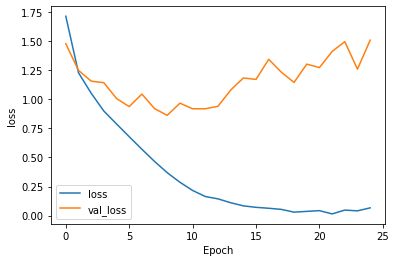

In [ ]:
pyplot.plot(history.history["loss"],label="loss")
pyplot.plot(history.history["val_loss"],label="val_loss")

pyplot.xlabel("Epoch")
pyplot.ylabel("loss")

pyplot.legend()
pyplot.show()

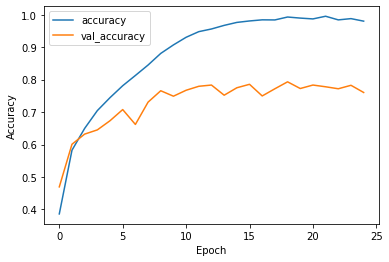

In [ ]:
pyplot.plot(history.history["accuracy"],label="accuracy")
pyplot.plot(history.history["val_accuracy"],label="val_accuracy")

pyplot.xlabel("Epoch")
pyplot.ylabel("Accuracy")

pyplot.legend()
pyplot.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {test_loss}, Accuracy: {test_accuracy}")

41/41 [==============================] - 1s 28ms/step - loss: 1.5082 - accuracy: 0.7603
Loss: 1.5082229375839233, Accuracy: 0.7603053450584412
